## Novelty Detection in News Project

### Introduction
This project aims to develop a novelty detection system applied to sports news. Novelty detection is a machine learning task that identifies new content by comparing it to previously known information.

### Task
The main task is to identify "novel" news articles that cover new aspects within each event. We use the news in the `source` folder as a reference to evaluate the items in the `target` folder, implementing novelty detection algorithms to detect significant changes in content. ( anomalies )

### Dataset
We are using the **LREC2018 corpus** in the "SPORTS" category. The dataset is organized by events in subfolders, where each event contains:
- A `source` folder with three initial (seed) news articles.
- A `target` folder with additional news articles to be evaluated as "novel" or "non-novel."

Each article has a `.txt` file with the content and an accompanying `.xml` file containing metadata such as title, publication date, publisher, and other event-related information.



-----

### Libs

In [1]:
from scripts.parser import CorpusParser 
import os
import pandas as pd

base_dir = os.getcwd()
corpus_dir = os.path.join(base_dir, 'database', 'TAP-DLND-1.0_LREC2018')

parser = CorpusParser(corpus_dir)
df_news = parser.parse()


In [2]:
from tabulate import tabulate
print(tabulate(df_news, headers='keys', tablefmt='psql'))

+----+------------+---------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Data Structure and Preprocessing news text


**tokenize / remove punctuation and stopwords**

In [3]:
from scripts.tokenize_and_normalize import tokenize_and_remove_punctuation, remove_stopwords

df_news['content_clean_tokenized'] = df_news['content'].apply(tokenize_and_remove_punctuation)
print(df_news['content_clean_tokenized'].iloc[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mab0205/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mab0205/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First 10 stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Currently', 'reading', 'Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Baba', 'Ramdev', 'Wrestling', 'Yoga', 'guru', 'Ramdev', 'will', 'challenge', 'the', 'Olympic', 'for', 'a', 'friendly', 'wrestling', 'bout', 'ahead', 'of', 'the', 'second', 'semifinal', 'match', 'between', 'Mumbai', 'Maharathi', 'and', 'NCR', 'Punjab', 'Royals', 'in', 'the', 'Pro', 'Wrestling', 'League', 'The', 'eye', 'turning', 'match', 'is', 'scheduled', 'at', 'pm', 'today', 'in', 'New', 'Delhi', 'Indira', 'Gandhi', 'Indoor', 'Stadium', 'I', 'have', 'fought', 'bouts', 'with', 'national', 'level', 'wrestlers', 'But', 'playing', 'against', 'an', 'internationally', 'r

In [4]:
# Filtrar contenido sin stopwords
df_news['content_no_sw'] = df_news['content_clean_tokenized'].apply(remove_stopwords)
print('the length of the content:',len(df_news['content_clean_tokenized'].iloc[0]))
print('the length after cleaning:',len(df_news['content_no_sw'].iloc[0]))

the length of the content: 244
the length after cleaning: 147


**Lemmatization**
- The goal is to convert words to their base form to standardize the text data. We need the `spacy en_core_web_sm` model to apply the lemmatization function effectively to our corpus.


In [5]:
from scripts.lemmatize_text import lemmatize_text

df_news = lemmatize_text(df_news)
print('ORIGINAL CORPUS:\n',df_news['content'].iloc[0])
print('CORPUS CLEANED: \n',df_news['content_no_sw'].iloc[0])

ORIGINAL CORPUS:
 Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist Currently reading: Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist #Baba Ramdev , #Wrestling   14:24:22] Yoga guru Ramdev will challenge the 2008 Olympic   for a friendly wrestling bout ahead of the second semifinal match between Mumbai Maharathi and NCR Punjab Royals, in the Pro Wrestling League. 
The eye turning match is scheduled at 6:30 pm today in New Delhi's Indira Gandhi Indoor Stadium. 
“I have fought bouts with national level wrestlers. But playing against an internationally renowned player will be more exciting. You will witness the real power of yoga in this match,” said Ramdev. 
Andrey is   for beating   at the Beijing Olympics. As Andrey reached the finals   
Before the 2nd semifinal on Wednesday, these two will play a friendly bout. Baba Ramdev says he does stamina building exercises daily and when

- After applying all the cleaning strategies, the newly processed corpus shows significant differences. This will enhance our exploratory analysis and improve model performance.


**Feature importance and remove non relevant features** 

In [6]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   event_id                 96 non-null     string
 1   news_id                  96 non-null     string
 2   content                  96 non-null     string
 3   is_source                96 non-null     bool  
 4   DOP                      96 non-null     string
 5   publisher                96 non-null     string
 6   title                    6 non-null      string
 7   eventid                  96 non-null     string
 8   eventname                96 non-null     string
 9   topic                    96 non-null     string
 10  sentence                 96 non-null     Int64 
 11  words                    96 non-null     Int64 
 12  sourceid                 90 non-null     string
 13  DLA                      90 non-null     string
 14  SLNS                     90 non-null     str

In [7]:
from scripts.drop_feature import drop_constant_columns

drop_constant_columns(df_news)

Column 'content_clean_tokenized' was skipped due to unhashable data types.
The following columns were dropped because all values were the same: ['DOP', 'topic']


In [8]:
df_news[:3]

event_id        news_id                                            content  \
0  SPTE001  SPTE001SRC003  Dangal: Baba Ramdev to wrestle it out with Rus...   
1  SPTE001  SPTE001SRC001  Even as the Pro Wrestling League continues, wh...   
2  SPTE001  SPTE001SRC002  
In the ongoing Pro Wrestling League, Haryana ...   

   is_source            publisher  \
0       True  www.indiatvnews.com   
1       True       Indiatimes.com   
2       True       www.news18.com   

                                               title  eventid  \
0  Dangal-Baba Ramdev to wrestle it out with Russ...  SPTE001   
1  Baba Ramdev Calls Out Olympic Wrestling Medall...  SPTE001   
2  Baba Ramdev Challenges Beijing Olympic Medalli...  SPTE001   

                         eventname  sentence  words sourceid   DLA  SLNS  \
0  Baba Ramdev wrestling challenge        13    269     <NA>  <NA>  <NA>   
1  Baba Ramdev wrestling challenge         6     92     <NA>  <NA>  <NA>   
2  Baba Ramdev wrestling challenge        14    267     <NA>  <NA>  <NA>   

                             content_clean_tokenized  \
0  [Dangal, Baba, Ramdev, to, wrestle, it, out, w...   
1  [Even, as, the, Pro, Wrestling, League, contin...   
2  [In, the, ongoing, Pro, Wrestling, League, Har...   

                                       content_no_sw  
0  dangal baba ramdev wrestle russian olympic med...  
1  pro wrestling league continue draw interest ma...  
2  ongoing pro wrestling league haryana hammers j...

- Looking at the variavels, its not interesting using the ids and the title beacause just 6 non-null

In [9]:
df_news.drop(columns=['event_id', 'news_id', 'eventid', 'sourceid', 'title'], inplace=True)
print("Columnas restantes en df_news: \n", df_news.columns)


Columnas restantes en df_news: 
 Index(['content', 'is_source', 'publisher', 'eventname', 'sentence', 'words',
       'DLA', 'SLNS', 'content_clean_tokenized', 'content_no_sw'],
      dtype='object')


- After processing the corpus, it is no longer necessary to retain the columns `content_clean_tokenized` and `content`.

In [10]:
df_news.drop(columns=['content_clean_tokenized', 'content'], inplace=True)
print("Columnas restantes en df_news: \n", df_news.columns)

Columnas restantes en df_news: 
 Index(['is_source', 'publisher', 'eventname', 'sentence', 'words', 'DLA',
       'SLNS', 'content_no_sw'],
      dtype='object')


- But what is the content of DLA comun? 

In [11]:
# Calculate the count and percentage of each category in the 'DLA' column
counts = df_news['DLA'].value_counts(normalize=True) * 100

print("Percentage of each category in the 'DLA' column:")
for category, percentage in counts.items():
    print(f"{category}: {percentage:.2f}%")

Percentage of each category in the 'DLA' column:
Non-Novel: 56.67%
Novel: 43.33%


**Analysis Insight:**

This information is particularly interesting because we can use `DLA` as an identifier to label news as either "Novel" or "Non-Novel." We will train our model using the `source` news as the training set and the `target` news as the test set. Finally, we’ll compare the results to evaluate how well our model identifies the novelty of new items.


In [12]:
df_news[:3]

is_source            publisher                        eventname  sentence  \
0       True  www.indiatvnews.com  Baba Ramdev wrestling challenge        13   
1       True       Indiatimes.com  Baba Ramdev wrestling challenge         6   
2       True       www.news18.com  Baba Ramdev wrestling challenge        14   

   words   DLA  SLNS                                      content_no_sw  
0    269  <NA>  <NA>  dangal baba ramdev wrestle russian olympic med...  
1     92  <NA>  <NA>  pro wrestling league continue draw interest ma...  
2    267  <NA>  <NA>  ongoing pro wrestling league haryana hammers j...

- There are 6 null values in the `SLNS` and `DLA` columns. I will check the correlation to assess their importance and determine the best technique to handle this issue. Options include removing the data, using it for testing, or filling in the missing values.

In [13]:
df_source = df_news[df_news['is_source'] == True]
df_target = df_news[df_news['is_source'] == False]

### Exploratory Analysis

- Visualization of variable distribution
- Principal Component Analysis (PCA)
- Latent Semantics and Topic Modeling
- Correlation between variables
- A temporal analysis was not possible due to the lack of temporal data, so our task will be solely focused on classifying new data in relation to target data.

Analysis of Variance in Text Data:
Evaluating the variance of extracted text features (such as TF-IDF or embeddings) can indicate how diverse the content is within source and target. If target shows greater variance, this could support the hypothesis that it contains novel information.

Clustering Exploration:
Applying clustering algorithms (such as K-Means or DBSCAN) can help determine if target and source form separate groups or if they overlap. This can provide a visual understanding of document differences and whether target exhibits distinctive patterns.

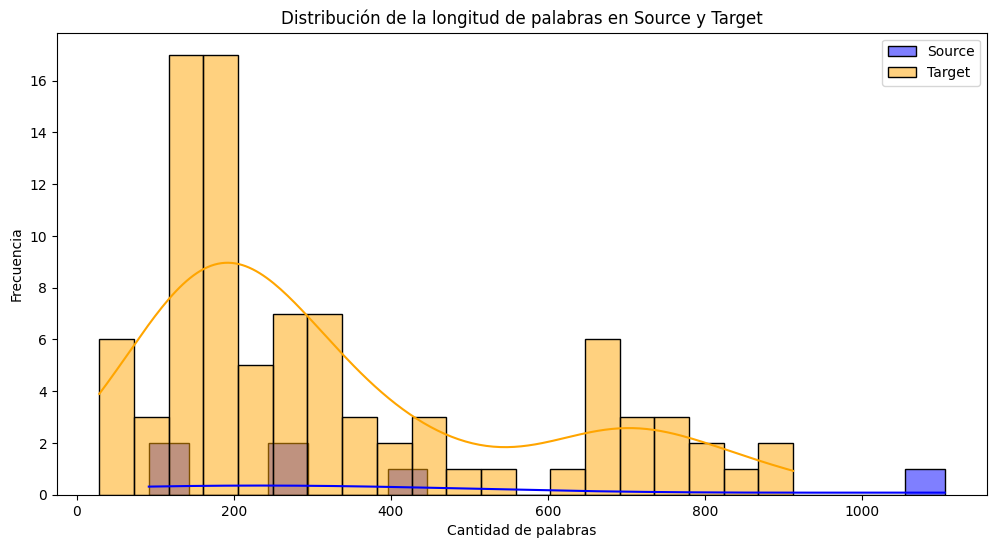

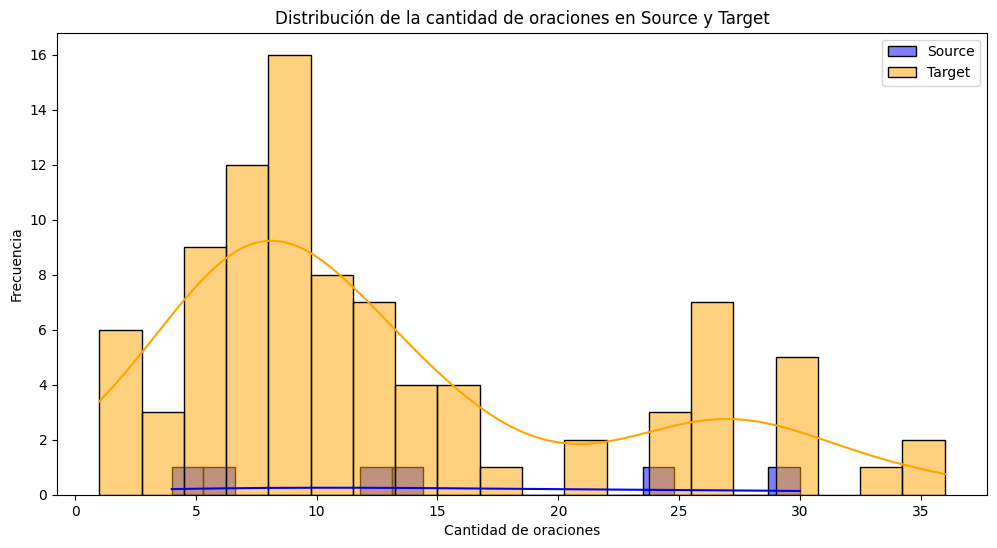

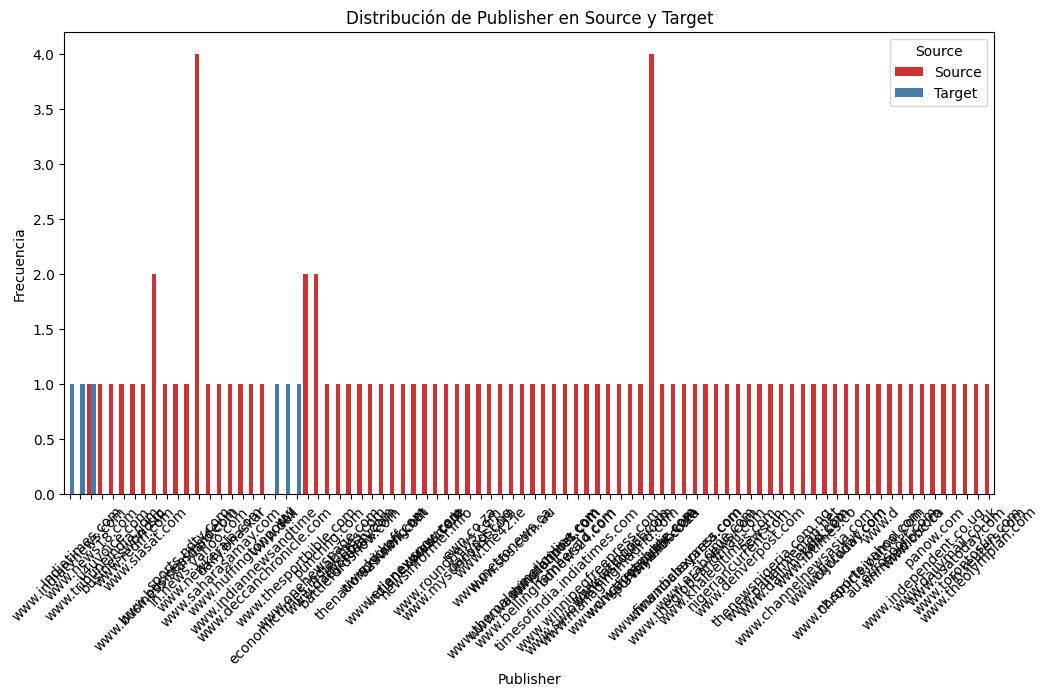

In [14]:
from Exploratory_Analysis.variable_distribution import len_words_distribution, count_sentences_distribution, publisher_distribution

len_words_distribution(df_source, df_target )
count_sentences_distribution(df_source, df_target )
publisher_distribution(df_news)

**Analysis Summary:**

- The word count and sentence count distributions show distinct patterns between `source` and `target`, suggesting structural differences that could be useful for novelty detection.
- The `publisher` feature shows minimal repetition and likely introduces noise, so it may be better to exclude it. However, we’ll attempt PCA to assess if `publisher` provides any value.

**Next Steps:**
- Try using PCA to determine if `publisher` is useful; otherwise, consider removing it.
- Extract word and sentence count as additional features to help the model learn structural differences.
- Explore other text features like keyword frequency or recurring topics.

###  Principal Component Analises (PCA)
-  PCA transforms the original variables into a new set of variables called principal components, which are orthogonal (uncorrelated) and ordered by the amount of variance they capture from the data. Se below how the original variables are now transformed into the same number of components.

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.preprocessing import StandardScaler

In [16]:
# Eliminar filas donde 'DLA' es NaN
df_news = df_news[df_news['DLA'].notna()]

# Convertir valores de 'DLA' a 1 para "Novel" y 0 para "Non-Novel"
df_news['DLA'] = df_news['DLA'].apply(lambda x: 1 if x == 'Novel' else 0)

# Seleccionar las características para PCA
features = [ 'sentence', 'words']
# Convertir las columnas especificadas a tipo float
df_news[features] = df_news[features].astype(float)

# Extraer los datos para PCA
X = df_news[features]

# Normalizar las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Realizar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Crear un nuevo DataFrame con los resultados de PCA
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

df_pca

PC1       PC2
0  -0.036674  0.232114
1  -0.386407  0.102131
2   0.349087  0.166165
3  -0.793532  0.189444
4  -0.024465  0.219905
..       ...       ...
85 -0.096459 -0.187818
86 -1.042547 -0.041258
87 -0.766662  0.002668
88  2.171663  0.102549
89  2.171663  0.102549

[90 rows x 2 columns]

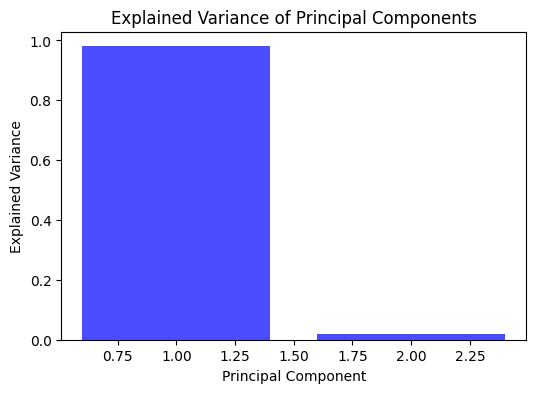

In [17]:
import matplotlib.pyplot as plt
explained_variance = pca.explained_variance_ratio_

# plot the explained variance
plt.figure(figsize=(6, 4))
plt.bar(range(1, len(explained_variance)+1), explained_variance, color='blue', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance of Principal Components')
plt.show()

In [18]:
loadings = pca.components_[:2].T

# create a dataframe with the loadings
df_loadings = pd.DataFrame(loadings, index=features, columns=['PC1', 'PC2'])

df_loadings

PC1       PC2
sentence  0.707107  0.707107
words     0.707107 -0.707107

### Models

In [ ]:
# Preparar los datos de entrenamiento y prueba a partir de `df_news`
X_train = df_news[df_news['is_source'] == True]['content_no_sw'].astype(str)  # Solo datos de `source`
X_test = df_news[df_news['is_source'] == False]['content_no_sw'].astype(str)  # Solo datos de `target`